In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2
import utils
import numpy as np
import matplotlib.pyplot as plt

## All features

In [2]:
df = pd.read_csv('./data/diabetes_data.csv')
df['gender'] = df['gender'].replace({'Male':0, 'Female':1})

In [3]:
X_train, X_test, y_train, y_test = utils.split_data(df)

In [4]:
df_all = utils.apply_classifiers_prob(X_train, y_train, X_test, y_test)
df_all['#features'] = 16
df_all['method'] = 'All features'
df_all

/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,accuracy,precision,recall,f1_score,roc_auc,Model,#features,method
0,0.923,0.923,0.923,0.922,0.971,LogisticRegression,16,All features
1,0.875,0.883,0.875,0.877,0.968,LinearDiscriminantAnalysis,16,All features
2,0.942,0.944,0.942,0.941,0.992,QuadraticDiscriminantAnalysis,16,All features
3,0.837,0.851,0.837,0.840,0.951,BernoulliNB,16,All features
4,0.962,0.966,0.962,0.962,0.994,StackingClassifier,16,All features
5,0.962,0.966,0.962,0.962,0.999,BaggingClassifier,16,All features
6,0.981,0.982,0.981,0.981,1.000,AdaBoostClassifier,16,All features
7,0.990,0.991,0.990,0.990,1.000,RandomForestClassifier,16,All features


In [5]:
df_all['Model'].unique()

array(['LogisticRegression', 'LinearDiscriminantAnalysis',
       'QuadraticDiscriminantAnalysis', 'BernoulliNB',
       'StackingClassifier', 'BaggingClassifier', 'AdaBoostClassifier',
       'RandomForestClassifier'], dtype=object)

In [21]:
utils.df_to_tex(df_all)

\begin{tabular}{llrrrrrrl}
\toprule
 & Model & accuracy & precision & recall & f1_score & roc_auc & #features & method \\
\midrule
0 & LogisticRegression & 0.92 & 0.92 & 0.92 & 0.92 & 0.97 & 16 & All features \\
1 & LinearDiscriminantAnalysis & 0.88 & 0.88 & 0.88 & 0.88 & 0.97 & 16 & All features \\
2 & QuadraticDiscriminantAnalysis & 0.94 & 0.94 & 0.94 & 0.94 & 0.99 & 16 & All features \\
3 & BernoulliNB & 0.84 & 0.85 & 0.84 & 0.84 & 0.95 & 16 & All features \\
4 & StackingClassifier & 0.96 & 0.97 & 0.96 & 0.96 & 0.99 & 16 & All features \\
5 & BaggingClassifier & 0.96 & 0.97 & 0.96 & 0.96 & 1.00 & 16 & All features \\
6 & AdaBoostClassifier & 0.98 & 0.98 & 0.98 & 0.98 & 1.00 & 16 & All features \\
7 & RandomForestClassifier & 0.99 & 0.99 & 0.99 & 0.99 & 1.00 & 16 & All features \\
\bottomrule
\end{tabular}



## Univariate filtered subset selection

In [6]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

df_univar = pd.DataFrame()
for k in range(1,17): 
    
    print(f'Using {k} best features...........')
    X = df.drop(columns=['class'])
    y = df['class']
    
    selector = SelectKBest(chi2, k=k).fit(X, y)
    X_new = selector.transform(X)
    selected_feature_names = X.columns[selector.get_support()].tolist()
    print(selected_feature_names)
    
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
    df_univ_k = utils.apply_classifiers_prob(X_train, y_train, X_test, y_test)
    
    df_univ_k['#features'] = k
    df_univar = pd.concat([df_univar, df_univ_k], axis=0)
    print()

Using 1 best features...........
['polydipsia']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Using 2 best features...........
['polyuria', 'polydipsia']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Using 3 best features...........
['gender', 'polyuria', 'polydipsia']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Using 4 best features...........
['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Using 5 best features...........
['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'partial_paresis']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Using 6 best features...........
['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'irritability', 'partial_paresis']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Using 7 best features...........
['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'polyphagia', 'irritability', 'partial_paresis']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Using 8 best features...........
['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'polyphagia', 'irritability', 'partial_paresis', 'alopecia']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Using 9 best features...........
['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'polyphagia', 'irritability', 'partial_paresis', 'alopecia']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Using 10 best features...........
['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'polyphagia', 'visual_blurring', 'irritability', 'partial_paresis', 'alopecia']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Using 11 best features...........
['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'visual_blurring', 'irritability', 'partial_paresis', 'alopecia']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Using 12 best features...........
['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'irritability', 'partial_paresis', 'alopecia']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Using 13 best features...........
['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'irritability', 'partial_paresis', 'muscle_stiffness', 'alopecia']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Using 14 best features...........
['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'irritability', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Using 15 best features...........
['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Using 16 best features...........
['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [7]:
df_univar['method'] = 'Univariate'
df_univar

,accuracy,precision,recall,f1_score,roc_auc,Model,#features,method
0,0.798,0.854,0.798,0.805,0.836,LogisticRegression,1,Univariate
1,0.798,0.854,0.798,0.805,0.836,LinearDiscriminantAnalysis,1,Univariate
2,0.798,0.854,0.798,0.805,0.836,QuadraticDiscriminantAnalysis,1,Univariate
3,0.798,0.854,0.798,0.805,0.836,BernoulliNB,1,Univariate
4,0.798,0.854,0.798,0.805,0.836,StackingClassifier,1,Univariate
...,...,...,...,...,...,...,...,...
3,0.837,0.851,0.837,0.840,0.951,BernoulliNB,16,Univariate
4,0.962,0.966,0.962,0.962,0.994,StackingClassifier,16,Univariate
5,0.962,0.966,0.962,0.962,0.999,BaggingClassifier,16,Univariate
6,0.981,0.982,0.981,0.981,1.000,AdaBoostClassifier,16,Univariate


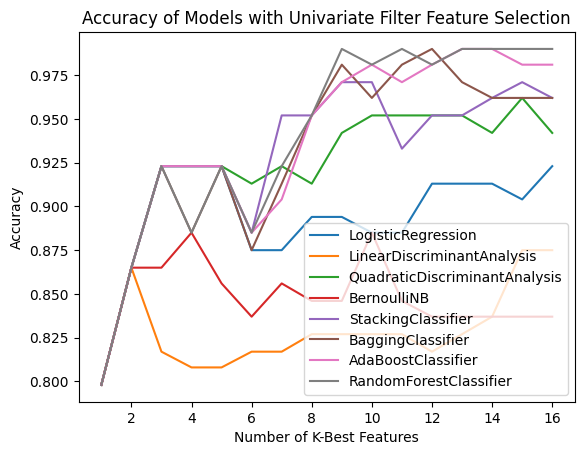

In [19]:
for model in df_univar['Model'].unique():
    df_model = df_univar[df_univar['Model'] == model]
    plt.plot(df_model['#features'], df_model['accuracy'], label=model, )

plt.legend()    
plt.title('Accuracy of Models with Univariate Filter Feature Selection')
plt.xlabel('Number of K-Best Features')
plt.ylabel("Accuracy")
plt.savefig('./img/all-features-kbest.png')
plt.show()

## Multivariate filtered subset selection

In [9]:
#from skrebate import ReliefF
from ReliefF import ReliefF

df = pd.read_csv("./data/diabetes_data.csv")  # Load your actual data
df = utils.clean_data(df)
X_train, X_test, y_train, y_test = utils.split_data(df)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(416, 16)
(104, 16)
(416,)
(104,)


In [10]:
fs = ReliefF()
# fs = ReliefF(n_features_to_keep=7) # to change the number of features in the subset
X_train_relief = fs.fit_transform(X_train.values, y_train.values)

importance = fs.feature_scores
sorted_indices = np.argsort(importance)[::-1] 
top_feature_indices = sorted_indices[:X_train_relief.shape[1]]  

selected_feature_names = X_train.columns[top_feature_indices].tolist()

print("Selected features:", selected_feature_names)
print(X_train_relief)
print("--------------")
print("(No. of tuples, No. of Columns before ReliefF) : "+str(X_train.shape)+
      "\n(No. of tuples , No. of Columns after ReliefF) : "+str(X_train_relief.shape))

Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia', 'visual_blurring', 'weakness']
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [0 0 1 ... 0 0 1]
 ...
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 0 1 0]]
--------------
(No. of tuples, No. of Columns before ReliefF) : (416, 16)
(No. of tuples , No. of Columns after ReliefF) : (416, 10)


In [11]:
df_multivar = pd.DataFrame()
for k in range(1,17): 
    print(f'Using {k} best features...........')
    X = df.drop(columns=['class'])
    y = df['class']
    fs = ReliefF(n_features_to_keep=k)
    X_train, X_test, y_train, y_test = utils.split_data(df)
    X_train_relief = fs.fit_transform(X_train.values, y_train.values)
    X_test_relief = fs.transform(X_test.values) 
    importance = fs.feature_scores
    sorted_indices = np.argsort(importance)[::-1] 
    top_feature_indices = sorted_indices[:X_train_relief.shape[1]]  
    selected_feature_names = X_train.columns[top_feature_indices].tolist()
    print("Selected features:", selected_feature_names)
    df_multivar_k = utils.apply_classifiers_prob(X_train_relief, y_train, X_test_relief, y_test)
    df_multivar_k['#features'] = k
    df_multivar = pd.concat([df_multivar, df_multivar_k], axis=0)

Using 1 best features...........
Selected features: ['polyuria']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using 2 best features...........
Selected features: ['polyuria', 'polydipsia']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using 3 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using 4 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using 5 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using 6 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using 7 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using 8 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using 9 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia', 'visual_blurring']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using 10 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia', 'visual_blurring', 'weakness']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using 11 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia', 'visual_blurring', 'weakness', 'delayed_healing']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using 12 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia', 'visual_blurring', 'weakness', 'delayed_healing', 'irritability']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using 13 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia', 'visual_blurring', 'weakness', 'delayed_healing', 'irritability', 'obesity']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using 14 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia', 'visual_blurring', 'weakness', 'delayed_healing', 'irritability', 'obesity', 'itching']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using 15 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia', 'visual_blurring', 'weakness', 'delayed_healing', 'irritability', 'obesity', 'itching', 'genital_thrush']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Using 16 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia', 'visual_blurring', 'weakness', 'delayed_healing', 'irritability', 'obesity', 'itching', 'genital_thrush', 'age']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [12]:
df_multivar['method'] = 'Multivariate. RelieF'
df_multivar

,accuracy,precision,recall,f1_score,roc_auc,Model,#features,method
0,0.798,0.844,0.798,0.805,0.828,LogisticRegression,1,Multivariate. RelieF
1,0.798,0.844,0.798,0.805,0.828,LinearDiscriminantAnalysis,1,Multivariate. RelieF
2,0.798,0.844,0.798,0.805,0.828,QuadraticDiscriminantAnalysis,1,Multivariate. RelieF
3,0.798,0.844,0.798,0.805,0.828,BernoulliNB,1,Multivariate. RelieF
4,0.798,0.844,0.798,0.805,0.828,StackingClassifier,1,Multivariate. RelieF
...,...,...,...,...,...,...,...,...
3,0.837,0.851,0.837,0.840,0.951,BernoulliNB,16,Multivariate. RelieF
4,0.971,0.972,0.971,0.971,0.993,StackingClassifier,16,Multivariate. RelieF
5,0.962,0.966,0.962,0.962,0.998,BaggingClassifier,16,Multivariate. RelieF
6,0.981,0.982,0.981,0.981,1.000,AdaBoostClassifier,16,Multivariate. RelieF


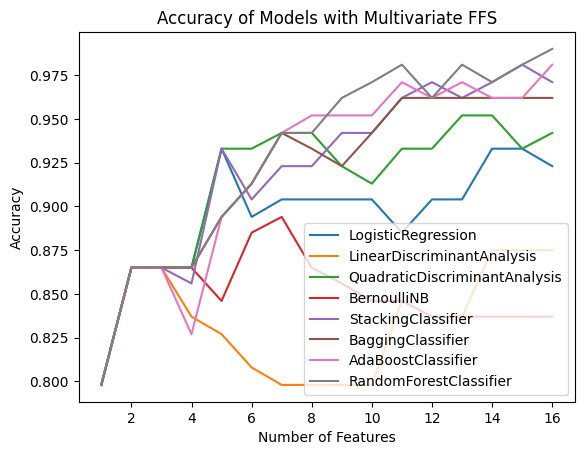

In [20]:
for model in df_multivar['Model'].unique():
    df_model = df_multivar[df_multivar['Model'] == model]
    plt.plot(df_model['#features'], df_model['accuracy'], label=model)

plt.legend()    
plt.title('Accuracy of Models with Multivariate FFS')
plt.xlabel('Number of Features')
plt.ylabel("Accuracy")
plt.savefig('./img/multivariate-kvalues-prob.png')
plt.show()

## Wrapper method

In [23]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=200, random_state=42)
sfs = SequentialFeatureSelector(lr_model)
sfs.fit(X_train, y_train)
sfs.get_support()
X_train_wrapper = sfs.transform(X_train)
X_test_wrapper = sfs.transform(X_test)
features_wrapper = sfs.get_feature_names_out()
print(f'Obtained {len(features_wrapper)} features: {features_wrapper}')

Obtained 8 features: ['age' 'gender' 'polyuria' 'polydipsia' 'visual_blurring'
 'delayed_healing' 'partial_paresis' 'alopecia']


In [24]:
df_wrapper = utils.apply_classifiers_prob(X_train_wrapper, y_train, X_test_wrapper, y_test)
df_wrapper['#features'] = len(X_train_wrapper[0])
df_wrapper['method'] = 'Wrapper. SFS'
df_wrapper

/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,accuracy,precision,recall,f1_score,roc_auc,Model,#features,method
0,0.923,0.924,0.923,0.922,0.965,LogisticRegression,8,Wrapper. SFS
1,0.817,0.839,0.817,0.822,0.961,LinearDiscriminantAnalysis,8,Wrapper. SFS
2,0.942,0.944,0.942,0.941,0.979,QuadraticDiscriminantAnalysis,8,Wrapper. SFS
3,0.875,0.889,0.875,0.878,0.959,BernoulliNB,8,Wrapper. SFS
4,0.933,0.936,0.933,0.933,0.988,StackingClassifier,8,Wrapper. SFS
5,0.933,0.936,0.933,0.933,0.992,BaggingClassifier,8,Wrapper. SFS
6,0.971,0.971,0.971,0.971,0.997,AdaBoostClassifier,8,Wrapper. SFS
7,0.952,0.952,0.952,0.952,0.994,RandomForestClassifier,8,Wrapper. SFS


In [16]:
results_all = pd.concat([df_all, df_univar, df_multivar, df_wrapper] )
results_all = results_all[['method','#features','Model', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']]
results_all

,method,#features,Model,accuracy,precision,recall,f1_score,roc_auc
0,All features,16,LogisticRegression,0.923,0.923,0.923,0.922,0.971
1,All features,16,LinearDiscriminantAnalysis,0.875,0.883,0.875,0.877,0.968
2,All features,16,QuadraticDiscriminantAnalysis,0.942,0.944,0.942,0.941,0.992
3,All features,16,BernoulliNB,0.837,0.851,0.837,0.840,0.951
4,All features,16,StackingClassifier,0.962,0.966,0.962,0.962,0.994
...,...,...,...,...,...,...,...,...
3,Wrapper. SFS,8,BernoulliNB,0.856,0.870,0.856,0.859,0.946
4,Wrapper. SFS,8,StackingClassifier,0.942,0.942,0.942,0.942,0.993
5,Wrapper. SFS,8,BaggingClassifier,0.971,0.972,0.971,0.971,0.995
6,Wrapper. SFS,8,AdaBoostClassifier,0.962,0.962,0.962,0.962,0.988


In [17]:
results_all.sort_values(by='accuracy', ascending=False)

,method,#features,Model,accuracy,precision,recall,f1_score,roc_auc
6,Univariate,13,AdaBoostClassifier,0.990,0.991,0.990,0.990,0.994
7,All features,16,RandomForestClassifier,0.990,0.991,0.990,0.990,1.000
7,Univariate,13,RandomForestClassifier,0.990,0.991,0.990,0.990,1.000
7,Univariate,16,RandomForestClassifier,0.990,0.991,0.990,0.990,1.000
7,Univariate,9,RandomForestClassifier,0.990,0.991,0.990,0.990,1.000
...,...,...,...,...,...,...,...,...
6,Multivariate. RelieF,1,AdaBoostClassifier,0.798,0.844,0.798,0.805,0.828
5,Multivariate. RelieF,1,BaggingClassifier,0.798,0.844,0.798,0.805,0.828
4,Multivariate. RelieF,1,StackingClassifier,0.798,0.844,0.798,0.805,0.828
3,Multivariate. RelieF,1,BernoulliNB,0.798,0.844,0.798,0.805,0.828


In [28]:
results_all[((results_all['Model'] == 'StackingClassifier') | (results_all['Model'] == 'AdaBoostClassifier') | 
    (results_all['Model'] == 'BaggingClassifier') | (results_all['Model'] == 'BaggingClassifier') | 
    (results_all['Model'] == 'BaggingClassifier'))].sort_values(by='accuracy', ascending=False)

,method,#features,Model,accuracy,precision,recall,f1_score,roc_auc
6,Univariate,13,AdaBoostClassifier,0.990,0.991,0.990,0.990,0.994
5,Univariate,12,BaggingClassifier,0.990,0.991,0.990,0.990,0.997
6,Univariate,14,AdaBoostClassifier,0.990,0.991,0.990,0.990,0.992
6,Univariate,10,AdaBoostClassifier,0.981,0.982,0.981,0.981,0.994
6,All features,16,AdaBoostClassifier,0.981,0.982,0.981,0.981,1.000
...,...,...,...,...,...,...,...,...
5,Multivariate. RelieF,1,BaggingClassifier,0.798,0.844,0.798,0.805,0.828
6,Univariate,1,AdaBoostClassifier,0.798,0.854,0.798,0.805,0.836
5,Univariate,1,BaggingClassifier,0.798,0.854,0.798,0.805,0.836
4,Univariate,1,StackingClassifier,0.798,0.854,0.798,0.805,0.836
